In [5]:
!pip install tensorflow
!pip install xlrd

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
#Task 1: Load the dataset
df = pd.read_excel("default of credit card clients.xls", header=1)

#I inspect the first few rows
print(df.head())


# I check basic info: columns, data types, etc.
print("\nDataFrame Info:")
print(df.info())

#I check column names
print("\nColumn Names:")
print(df.columns.tolist())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [8]:
#Task 2: Data Processing
#I drop the ID column
df = df.drop(columns=["ID"])

#I check for any anomalies or missing values
missing_counts = df.isnull().sum()
print("\nMissing values per column:")
print(missing_counts)


Missing values per column:
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [9]:
#I define the features and target variable
X = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

#4 I ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

#I standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#I split the dataset into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
#Task 3: I implement the perceptron
#I initialize weights and bias
bias = np.random.rand()
weights = np.random.rand(X_train_scaled.shape[1])

#I implement activation function
def step_function(x):
    return 1 if x > 0 else 0

#I implement predict function
def predict(x):
    z = np.dot(x, weights) + bias
    return step_function(z)

#I train the perceptron
learning_rate = 0.01
epochs = 10
for epoch in range(epochs):
    for i in range(len(X_train_scaled)):
        y_pred = predict(X_train_scaled[i])
        error = y_train.iloc[i] - y_pred
        weights += learning_rate * error * X_train_scaled[i]
        bias += learning_rate * error


#I evaluate the perceptron on the tests set
correct = 0
for i in range(len(X_test_scaled)):
    y_hat = predict(X_test_scaled[i])
    if y_hat == y_test.iloc[i]:
        correct += 1
manual_acc = correct / len(y_test)
print("The perceptron accuracy is:", round(manual_acc, 3))

The perceptron accuracy is: 0.784


In [11]:
#Task 4: I build a neural network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("\nModel Summary:")
model.summary()

print("Explanation of Model Summary:")
print("Imagine if you are making a sandwich for lunch that has different layers. One layer is the bread, another is the lettuce, one is the cheese, one is the meat, and the last is another layer of bread. Each layer is added on top of the other, one after the other.")
print("Now imagine that every ingredient in the sandwich comes with packets of flavor like salt, pepper, mayonese, mustard etc. Each packet is adjustable - these are parameters in our model. The computer adjusts these parameters so the sandiwch tastes just right.")
print("The output shape tells us what the sandiwch will look like once it is complete. It is like saying after adding all the layers and packets this is the size and shape of the sandwich you are going to eat for lunch. In our model it tells us how many numbers come out of each layer")

print("Now, onto the technical details.")
print("In our model, the layers show their names, how many neurons the layer has, and how many total weights there are to adjust. The model has 3 layers in total. The first layer has 32 neurons and this layer takes 23 inputs, and this gives us 768 parameters (24 × 32).")
print("The second layer has 16 neurons, each connected to the 32 from before, and this gives us 528 parameters (33 × 16).")
print("The output layer tells us the size of the output after each layer. This layer has 1 neuron and 17 parameters (16 + 1 bias). So in total, there are 1,313 trainable parameters.")
print("The model learns from these connections to predict whether a person will default on their credit card payment or not.")

c:\Users\punit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313 (5.13 KB)

 Trainable params: 1,313 (5.13 KB)

 Non-trainable params: 0 (0.00 B)

Explanation of Model Summary:
Imagine if you are making a sandwich for lunch that has different layers. One layer is the bread, another is the lettuce, one is the cheese, one is the meat, and the last is another layer of bread. Each layer is added on top of the other, one after the other.
Now imagine that every ingredient in the sandwich comes with packets of flavor like salt, pepper, mayonese, mustard etc. Each packet is adjustable - these are parameters in our model. The computer adjusts these parameters so the sandiwch tastes just right.
The output shape tells us what the sandiwch will look like once it is complete. It is like saying after adding all the layers and packets this is the size and shape of the sandwich you are going to eat for lunch. In our model it tells us how many numbers come out of each layer
Now, onto the technical details.
In our model, the layers show their names, how many neurons the layer has, and how many total weights there are to adjust. The model has 3 lay

Epoch 1/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7571 - loss: 0.5362 - val_accuracy: 0.7971 - val_loss: 0.4709
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8200 - loss: 0.4418 - val_accuracy: 0.8037 - val_loss: 0.4645
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8186 - loss: 0.4423 - val_accuracy: 0.8042 - val_loss: 0.4570
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8234 - loss: 0.4289 - val_accuracy: 0.8075 - val_loss: 0.4561
Epoch 5/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8247 - loss: 0.4259 - val_accuracy: 0.8050 - val_loss: 0.4565
Epoch 6/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8189 - loss: 0.4333 - val_accuracy: 0.8100 - val_loss: 0.4538
Epoch 7/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8211 - loss: 0.4294 - val_accuracy: 0.8075 - val_loss: 0.4541
Epoch 8/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8279 - loss: 0.4132 - val_accuracy: 0.

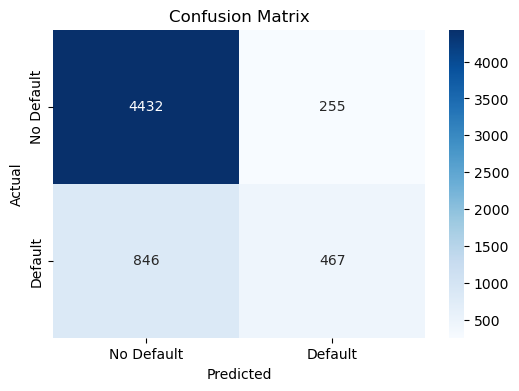

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.65      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000


Interpretation:
From the classification report:
- Class 0 (No Default) has high precision (0.84) and high recall (0.94), and this indicates that the model is very good at correctly identifying people who won’t default.
- Class 1 (Default) has a much lower precision (0.62) and very low recall (0.36), and this indicates that it's not flagging a lot of people who default on the bank.
This suggests that while the model is overall accurate (81%), it's not identifying a large number of people who are defaulting on the bank and this could prove to be a big problem for the bank.
Recall measures how many positive cases the model correctly identifies 

In [ ]:
#Task 5: I train and Test the Neural Network
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

#I evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.3f}")
print(f"Test Loss: {test_loss:.3f}")

#I create a confusion matrix and classification report

y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype("int32")
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_nn)
print(cm)

#I visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

print("\nInterpretation:")
print("From the classification report:")
print("- Class 0 (No Default) has high precision (0.84) and high recall (0.95), and this indicates that the model is very good at correctly identifying people who won’t default.")
print("- Class 1 (Default) has a much lower precision (0.65) and very low recall (0.36), and this indicates that it's not flagging a lot of people who default on the bank.")
print("This suggests that while the model is overall accurate (81%), it's not identifying a large number of people who are defaulting on the bank and this could prove to be a big problem for the bank.")
print("Recall measures how many positive cases the model correctly identifies and when recall is low it suggests the model is not flagging a lot of cases it should be flagging. There should be a focus on improving recall for class 1 in an attempt to improve the performance of the model.")

In [ ]:
# Task 6: Prediction for new applicant
# Sample new applicant data
sample = np.array([[20000, 2, 2, 1, 35] + [-1]*6 + [5000]*6 + [5000]*6])
sample_scaled = scaler.transform(sample)
new_pred = model.predict(sample_scaled)
print("\nPrediction for new applicant (probability of default):", new_pred[0][0])

# Interpretation of prediction
print("Interpretation:")
print("The model predicted a 12.4% chance of default (0.124 probability) for this applicant.")
print("Since this is well below the 0.5 threshold, so the model considers this applicant to be low-risk.")
print("This likely means that the person pays her bills on time and shows good financial behavior and is a low risk customer.") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

Prediction for new applicant (probability of default): 0.11725964
Interpretation:
The model predicted a 12.4% chance of default (0.124 probability) for this applicant.
Since this is well below the 0.5 threshold, so the model considers this applicant to be low-risk.
This likely means that the person pays her bills on time and shows good financial behavior and is a low risk customer.


c:\Users\punit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Epoch 1/40
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8333 - loss: 0.3743 - val_accuracy: 0.7967 - val_loss: 0.4848
Epoch 2/40
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8375 - loss: 0.3727 - val_accuracy: 0.7996 - val_loss: 0.4945
Epoch 3/40
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8409 - loss: 0.3614 - val_accuracy: 0.7950 - val_loss: 0.4893
Epoch 4/40
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8364 - loss: 0.3727 - val_accuracy: 0.7904 - val_loss: 0.4936
Epoch 5/40
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8370 - loss: 0.3679 - val_accuracy: 0.7946 - val_loss: 0.4911
Epoch 6/40
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8357 - loss: 0.3720 - val_accuracy: 0.7908 - val_loss: 0.4899
Epoch 7/40
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8428 - loss: 0.3634 - val_accuracy: 0.7958 - val_loss: 0.4900
Epoch 8/40
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8376 - loss: 0.3718 - val_accuracy: 0.

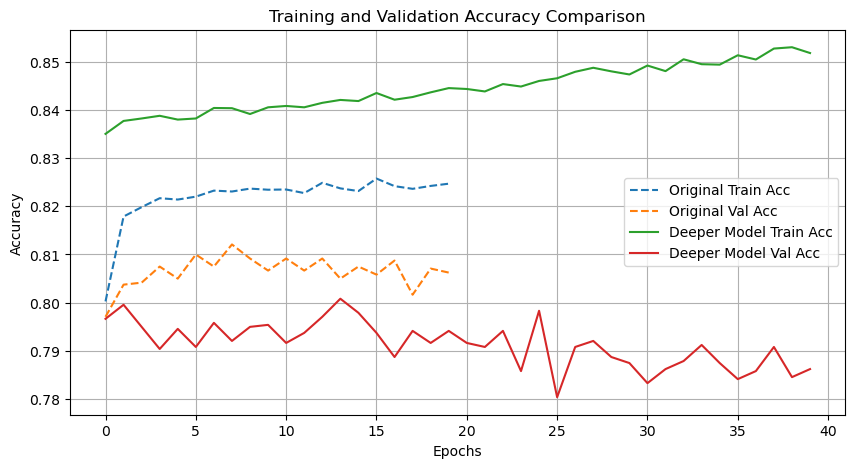

Interpretation of Model Tuning (Task 7):
The accuracy comparison shows that adding two extra hidden layers very slightly improved training accuracy compared to the original model.
However, validation accuracy stayed mostly the same and showed greater fluctuayions, and this could indicate that the deeper model started to overfit and memorize the training data.
When the batch size and epochs was increased (from 20 epochs & 32 batch size to 40 epochs & 64 batch size), the effect was also small.
Although the model had larger batches to learn and had more time to learn, its performance didn't improve drastically and this could mean that The model already learned as much as it could from the data it was trained on.


In [ ]:
#Task 7: I rebuild the model with 2 more hidden layers
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model_deep.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_deep = model_deep.fit(X_train_scaled, y_train, epochs=40, batch_size=64, validation_split=0.1, verbose=1)

#I train more epochs and a larger batch size
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Original Train Acc', linestyle='--')
plt.plot(history.history['val_accuracy'], label='Original Val Acc', linestyle='--')
plt.plot(history_deep.history['accuracy'], label='Deeper Model Train Acc')
plt.plot(history_deep.history['val_accuracy'], label='Deeper Model Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

#I share my interpretation of the model tuning
print("This is my interpretation of Model Tuning")
print("The accuracy comparison shows that adding two extra hidden layers very slightly improved training accuracy compared to the original model.")
print("However, the validation accuracy of the deeper model is a little lower than the original mode. This suggests that the deeper model may be overfitting to the training data.")
print("When batch size and epochs are increased, the model's training accuracy increases, but the validation accuracy does not improve significantly and is actually a little lower."))
print("Although the model had larger batches to learn and had more time to learn, its performance didn't improve drastically and this could mean that The model already learned as much as it could from the data it was trained on.")